In [228]:
from datetime import datetime, timedelta
from pandas import DataFrame
import matplotlib.pyplot as plt
import networkx as nx
from networkx import Graph
from networkx.drawing.nx_agraph import write_dot, graphviz_layout
from networkx.readwrite import json_graph
import os
from random import randint
import sys
from typing import Tuple

In [229]:
sys.path.append("../")
tests_dir = os.path.abspath("../tests")
sys.path.append(tests_dir)

In [230]:
from traffic_simulator.city_map import CityMap
from traffic_simulator.model import TimeDeltaDiff
from traffic_simulator.traffic_analysis import TrafficAnalyzer
from traffic_simulator.traffic_simulation import Simulator
from conftest import generate_static_city_map, generate_static_trips

##### Generate City Map

In [231]:
r2_city_map = generate_static_city_map()
r2_city_map

In [232]:
CityMap.get_city_map_statistics(r2_city_map)

node degree and node clustering
0 2 0
1 2 0
4 3 0
3 2 0
2 1 0

the adjacency list
0 1 4
1 3
4 2 3
3
2


{(0, 1): 6, (0, 4): 9, (1, 3): 11, (4, 2): 10, (4, 3): 7}


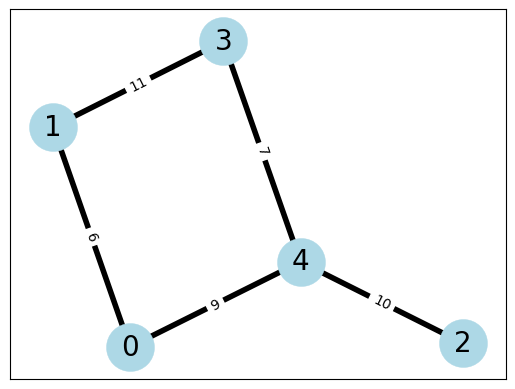

In [233]:
CityMap.visualize_city_map(r2_city_map)

# Generate Static Trips

In [234]:
r2_trips = generate_static_trips()
len(r2_trips)

20

In [235]:
r2_trips

{Trip(source=0, destination=2, numer_of_trips=1): Trip(source=0, destination=2, numer_of_trips=1),
 Trip(source=2, destination=0, numer_of_trips=1): Trip(source=2, destination=0, numer_of_trips=1),
 Trip(source=0, destination=3, numer_of_trips=1): Trip(source=0, destination=3, numer_of_trips=1),
 Trip(source=3, destination=0, numer_of_trips=1): Trip(source=3, destination=0, numer_of_trips=1),
 Trip(source=1, destination=2, numer_of_trips=1): Trip(source=1, destination=2, numer_of_trips=1),
 Trip(source=2, destination=1, numer_of_trips=2): Trip(source=2, destination=1, numer_of_trips=2),
 Trip(source=1, destination=4, numer_of_trips=1): Trip(source=1, destination=4, numer_of_trips=1),
 Trip(source=4, destination=1, numer_of_trips=2): Trip(source=4, destination=1, numer_of_trips=2),
 Trip(source=2, destination=3, numer_of_trips=3): Trip(source=2, destination=3, numer_of_trips=3),
 Trip(source=3, destination=2, numer_of_trips=1): Trip(source=3, destination=2, numer_of_trips=1),
 Trip(sour

# R2

#### The benefit values of constructing the following new roads:
#### (0,2), (0,3), (1,2), (1,4), (2,3)
#### Use a k value (budget) of 2, which two of the above roads would you recommend for construction? Remember that once the first road is 
#### constructed, benefits that you initially computed for the other 4 will now change and these will need to be recomputed.

##### Generate Benefit Matrix k = 0 # Initial Benefit Matrix

In [236]:
def get_max_benefit_road_segment(max_benefit_matrix: DataFrame) -> Tuple[int, int]:
    max_benefit = max_benefit_matrix.iloc[0].values
    source = int(max_benefit[0])
    destination = int(max_benefit[1])
    
    return source, destination

In [237]:
r2_benefit_matrix = TrafficAnalyzer.get_road_recommendations(r2_city_map, r2_trips)
r2_benefit_matrix

,source,destination,benefit
3,2,3,38.6
4,0,2,38.0
2,1,4,36.0
0,1,2,30.0
1,0,3,12.8


In [238]:
##### k = 1 # Recommended road to build first is the road segment (2,3)
r2_max_benefit_matrix = TrafficAnalyzer.get_max_road_benefit(r2_benefit_matrix)
r2_max_benefit_matrix

,source,destination,benefit
3,2,3,38.6


In [239]:
source, destination = get_max_benefit_road_segment(r2_max_benefit_matrix)
print(f"({source}, {destination})")

(2, 3)


{(0, 1): 6, (0, 4): 9, (1, 3): 11, (4, 2): 10, (4, 3): 7, (3, 2): 10.2}


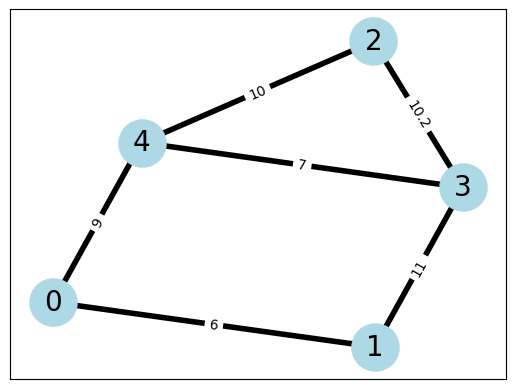

In [240]:
CityMap.add_road_segment(r2_city_map, source, destination)
CityMap.visualize_city_map(r2_city_map)

In [241]:
r2_benefit_matrix = TrafficAnalyzer.get_road_recommendations(r2_city_map, r2_trips)
r2_benefit_matrix

,source,destination,benefit
1,0,2,26.6
0,1,2,26.0
3,1,4,24.6
2,0,3,12.8


In [242]:
##### k = 2 # Next recommended road to be built is the road segment (0,2)
max_benefit_matrix = TrafficAnalyzer.get_max_road_benefit(r2_benefit_matrix)
max_benefit_matrix

,source,destination,benefit
1,0,2,26.6


In [243]:
source, destination = get_max_benefit_road_segment(r2_max_benefit_matrix)
print(f"({source}, {destination})")

(2, 3)


{(0, 1): 6, (0, 4): 9, (1, 3): 11, (4, 2): 10, (4, 3): 7, (3, 2): 6.119999999999999}


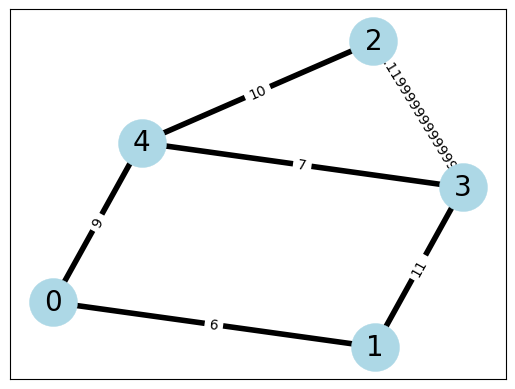

In [244]:
CityMap.add_road_segment(r2_city_map, source, destination)
CityMap.visualize_city_map(r2_city_map)

# R3

In [245]:
r3_city_map = Simulator.generate_map()
r3_city_map

In [246]:
r4_city_map = r3_city_map.copy()
r4_city_map

In [247]:
CityMap.get_city_map_statistics(r3_city_map)

node degree and node clustering
0 9 0.08333333333333333
1 9 0.1111111111111111
2 6 0.06666666666666667
3 6 0
4 8 0.14285714285714285
5 5 0
6 9 0.1388888888888889
7 5 0.1
8 11 0.16363636363636364
9 11 0.16363636363636364
10 8 0.03571428571428571
11 6 0.26666666666666666
12 12 0.13636363636363635
13 10 0.08888888888888889
14 16 0.11666666666666667
15 7 0.2857142857142857
16 9 0.05555555555555555
17 6 0.06666666666666667
18 11 0.07272727272727272
19 4 0.3333333333333333
20 6 0.06666666666666667
21 9 0.19444444444444445
22 5 0.1
23 8 0.21428571428571427
24 6 0.2
25 7 0.09523809523809523
26 6 0.2
27 9 0.2222222222222222
28 6 0.13333333333333333
29 11 0.16363636363636364
30 7 0.14285714285714285
31 13 0.16666666666666666
32 4 0.16666666666666666
33 7 0.047619047619047616
34 10 0.08888888888888889
35 5 0.1
36 1 0
37 4 0
38 3 0
39 7 0.14285714285714285
40 11 0.16363636363636364
41 7 0.09523809523809523
42 10 0.13333333333333333
43 8 0.03571428571428571
44 8 0.14285714285714285
45 16 0.09166666

{(0, 20): 15, (0, 3): 15, (0, 35): 22, (0, 59): 15, (0, 14): 8, (0, 27): 18, (0, 47): 7, (0, 32): 15, (0, 5): 17, (1, 12): 7, (1, 52): 18, (1, 50): 14, (1, 58): 5, (1, 39): 13, (1, 15): 10, (1, 13): 25, (1, 8): 6, (1, 22): 7, (2, 11): 15, (2, 3): 9, (2, 54): 11, (2, 8): 20, (2, 48): 23, (2, 20): 7, (3, 10): 12, (3, 38): 22, (3, 13): 5, (3, 31): 5, (4, 22): 5, (4, 14): 23, (4, 55): 11, (4, 6): 21, (4, 44): 8, (4, 5): 16, (4, 45): 18, (4, 15): 15, (5, 18): 5, (5, 31): 15, (5, 54): 24, (6, 25): 12, (6, 45): 6, (6, 31): 11, (6, 12): 10, (6, 46): 5, (6, 27): 7, (6, 21): 16, (6, 36): 25, (7, 12): 5, (7, 18): 17, (7, 22): 21, (7, 25): 5, (7, 45): 14, (8, 14): 22, (8, 23): 21, (8, 40): 18, (8, 35): 23, (8, 52): 20, (8, 51): 14, (8, 15): 10, (8, 34): 16, (8, 42): 6, (9, 31): 9, (9, 28): 10, (9, 56): 19, (9, 49): 16, (9, 48): 22, (9, 55): 16, (9, 46): 6, (9, 11): 16, (9, 47): 19, (9, 45): 17, (9, 58): 13, (10, 29): 5, (10, 16): 5, (10, 45): 24, (10, 54): 12, (10, 50): 10, (10, 30): 19, (10, 42):

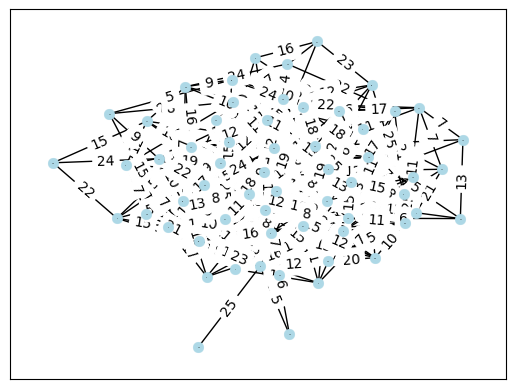

In [248]:
CityMap.visualize_city_map(r3_city_map, location_size=60, location_font_size=1, road_widths=1)

In [249]:
def get_traffic_times() -> Tuple[datetime, datetime]: 
    # (8 AM - 6 PM) # 10 hour time span
    start_time = datetime.strptime('08:00', '%H:%M').time()
    end_time = datetime.strptime('18:00', '%H:%M').time()
    
    start_date = datetime.now() - timedelta(days=30)
    random_start_datetime = datetime.combine(start_date.date(), start_time)
    
    random_end_datetime = random_start_datetime + timedelta(hours=10)

    return random_start_datetime, random_end_datetime
    
traffic_start_datetime, traffic_end_datetime = get_traffic_times()

print("Traffic start datetime:", traffic_start_datetime)
print("Traffic end datetime", traffic_end_datetime)

Traffic start datetime: 2024-01-14 08:00:00
Traffic end datetime 2024-01-14 18:00:00


In [250]:
r3_r4_trips = Simulator.generate_trips(city_map,
                                 traffic_start_datetime,
                                 traffic_end_datetime,
                                 TimeDeltaDiff.SECONDS)
r3_r4_number_of_trips = 0

for trip in r3_r4_trips:
    r3_r4_number_of_trips += trip.numer_of_trips

r3_r4_number_of_trips

36000

In [251]:
r3_r4_trips

{Trip(source=14, destination=48, numer_of_trips=9): Trip(source=14, destination=48, numer_of_trips=9),
 Trip(source=41, destination=23, numer_of_trips=10): Trip(source=41, destination=23, numer_of_trips=10),
 Trip(source=14, destination=52, numer_of_trips=12): Trip(source=14, destination=52, numer_of_trips=12),
 Trip(source=59, destination=3, numer_of_trips=6): Trip(source=59, destination=3, numer_of_trips=6),
 Trip(source=19, destination=47, numer_of_trips=10): Trip(source=19, destination=47, numer_of_trips=10),
 Trip(source=31, destination=0, numer_of_trips=14): Trip(source=31, destination=0, numer_of_trips=14),
 Trip(source=20, destination=21, numer_of_trips=9): Trip(source=20, destination=21, numer_of_trips=9),
 Trip(source=50, destination=46, numer_of_trips=12): Trip(source=50, destination=46, numer_of_trips=12),
 Trip(source=41, destination=3, numer_of_trips=9): Trip(source=41, destination=3, numer_of_trips=9),
 Trip(source=56, destination=55, numer_of_trips=6): Trip(source=56, d

In [252]:
r3_benefit_matrix = TrafficAnalyzer.get_road_recommendations(r3_city_map, r3_r4_trips)
r3_benefit_matrix

,source,destination,benefit
1533,14,47,2954.0
1318,12,23,2828.0
112,12,47,2418.0
661,9,40,2258.8
1519,14,34,2251.4
...,...,...,...
155,7,43,84.0
802,7,16,84.0
955,22,58,81.6
951,10,48,72.8


In [253]:
##### k = 1 # Recommended road to build first is the road segment
r3_max_benefit_matrix = TrafficAnalyzer.get_max_road_benefit(r3_benefit_matrix)
r3_max_benefit_matrix

,source,destination,benefit
1533,14,47,2954.0


In [254]:
source, destination = get_max_benefit_road_segment(r3_max_benefit_matrix)
print(f"({source}, {destination})")

(14, 47)


In [255]:
CityMap.add_road_segment(r3_city_map, source, destination)

{(0, 20): 15, (0, 3): 15, (0, 35): 22, (0, 59): 15, (0, 14): 8, (0, 27): 18, (0, 47): 7, (0, 32): 15, (0, 5): 17, (1, 12): 7, (1, 52): 18, (1, 50): 14, (1, 58): 5, (1, 39): 13, (1, 15): 10, (1, 13): 25, (1, 8): 6, (1, 22): 7, (2, 11): 15, (2, 3): 9, (2, 54): 11, (2, 8): 20, (2, 48): 23, (2, 20): 7, (3, 10): 12, (3, 38): 22, (3, 13): 5, (3, 31): 5, (4, 22): 5, (4, 14): 23, (4, 55): 11, (4, 6): 21, (4, 44): 8, (4, 5): 16, (4, 45): 18, (4, 15): 15, (5, 18): 5, (5, 31): 15, (5, 54): 24, (6, 25): 12, (6, 45): 6, (6, 31): 11, (6, 12): 10, (6, 46): 5, (6, 27): 7, (6, 21): 16, (6, 36): 25, (7, 12): 5, (7, 18): 17, (7, 22): 21, (7, 25): 5, (7, 45): 14, (8, 14): 22, (8, 23): 21, (8, 40): 18, (8, 35): 23, (8, 52): 20, (8, 51): 14, (8, 15): 10, (8, 34): 16, (8, 42): 6, (9, 31): 9, (9, 28): 10, (9, 56): 19, (9, 49): 16, (9, 48): 22, (9, 55): 16, (9, 46): 6, (9, 11): 16, (9, 47): 19, (9, 45): 17, (9, 58): 13, (10, 29): 5, (10, 16): 5, (10, 45): 24, (10, 54): 12, (10, 50): 10, (10, 30): 19, (10, 42):

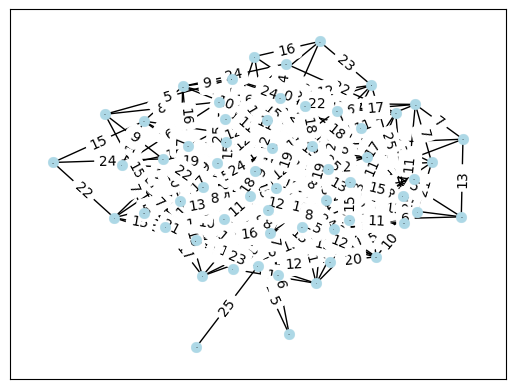

In [256]:
CityMap.visualize_city_map(r3_city_map, location_size=60, location_font_size=1, road_widths=1)

In [257]:
r3_benefit_matrix = TrafficAnalyzer.get_road_recommendations(r3_city_map, r3_r4_trips)
r3_benefit_matrix

,source,destination,benefit
1318,12,23,2828.0
112,12,47,2818.0
1519,14,34,2495.2
135,1,14,2487.2
661,9,40,2258.8
...,...,...,...
155,7,43,84.0
802,7,16,84.0
955,22,58,81.6
951,10,48,72.8


In [258]:
##### k = 2 # Recommended road to build first is the road segment
r3_max_benefit_matrix = TrafficAnalyzer.get_max_road_benefit(r3_benefit_matrix)
r3_max_benefit_matrix

,source,destination,benefit
1318,12,23,2828.0


In [259]:
source, destination = get_max_benefit_road_segment(r3_max_benefit_matrix)
print(f"({source}, {destination})")

(12, 23)


In [260]:
CityMap.add_road_segment(r3_city_map, source, destination)

{(0, 20): 15, (0, 3): 15, (0, 35): 22, (0, 59): 15, (0, 14): 8, (0, 27): 18, (0, 47): 7, (0, 32): 15, (0, 5): 17, (1, 12): 7, (1, 52): 18, (1, 50): 14, (1, 58): 5, (1, 39): 13, (1, 15): 10, (1, 13): 25, (1, 8): 6, (1, 22): 7, (2, 11): 15, (2, 3): 9, (2, 54): 11, (2, 8): 20, (2, 48): 23, (2, 20): 7, (3, 10): 12, (3, 38): 22, (3, 13): 5, (3, 31): 5, (4, 22): 5, (4, 14): 23, (4, 55): 11, (4, 6): 21, (4, 44): 8, (4, 5): 16, (4, 45): 18, (4, 15): 15, (5, 18): 5, (5, 31): 15, (5, 54): 24, (6, 25): 12, (6, 45): 6, (6, 31): 11, (6, 12): 10, (6, 46): 5, (6, 27): 7, (6, 21): 16, (6, 36): 25, (7, 12): 5, (7, 18): 17, (7, 22): 21, (7, 25): 5, (7, 45): 14, (8, 14): 22, (8, 23): 21, (8, 40): 18, (8, 35): 23, (8, 52): 20, (8, 51): 14, (8, 15): 10, (8, 34): 16, (8, 42): 6, (9, 31): 9, (9, 28): 10, (9, 56): 19, (9, 49): 16, (9, 48): 22, (9, 55): 16, (9, 46): 6, (9, 11): 16, (9, 47): 19, (9, 45): 17, (9, 58): 13, (10, 29): 5, (10, 16): 5, (10, 45): 24, (10, 54): 12, (10, 50): 10, (10, 30): 19, (10, 42):

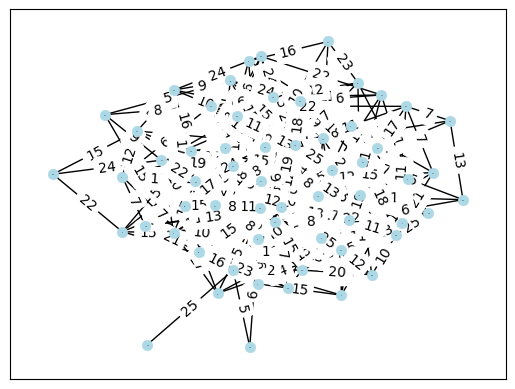

In [261]:
CityMap.visualize_city_map(r3_city_map, location_size=60, location_font_size=1, road_widths=1)

In [262]:
r3_benefit_matrix = TrafficAnalyzer.get_road_recommendations(r3_city_map, r3_r4_trips)
r3_benefit_matrix

,source,destination,benefit
112,12,47,2818.0
1518,14,34,2495.2
135,1,14,2487.2
661,9,40,2258.8
132,31,37,2246.0
...,...,...,...
155,7,43,84.0
802,7,16,84.0
955,22,58,81.6
951,10,48,72.8


In [263]:
##### k = 3 # Recommended road to build last is the road segment
r3_max_benefit_matrix = TrafficAnalyzer.get_max_road_benefit(r3_benefit_matrix)
r3_max_benefit_matrix

,source,destination,benefit
112,12,47,2818.0


In [264]:
source, destination = get_max_benefit_road_segment(r3_max_benefit_matrix)
print(f"({source}, {destination})")

(12, 47)


In [265]:
CityMap.add_road_segment(r3_city_map, source, destination)

{(0, 20): 15, (0, 3): 15, (0, 35): 22, (0, 59): 15, (0, 14): 8, (0, 27): 18, (0, 47): 7, (0, 32): 15, (0, 5): 17, (1, 12): 7, (1, 52): 18, (1, 50): 14, (1, 58): 5, (1, 39): 13, (1, 15): 10, (1, 13): 25, (1, 8): 6, (1, 22): 7, (2, 11): 15, (2, 3): 9, (2, 54): 11, (2, 8): 20, (2, 48): 23, (2, 20): 7, (3, 10): 12, (3, 38): 22, (3, 13): 5, (3, 31): 5, (4, 22): 5, (4, 14): 23, (4, 55): 11, (4, 6): 21, (4, 44): 8, (4, 5): 16, (4, 45): 18, (4, 15): 15, (5, 18): 5, (5, 31): 15, (5, 54): 24, (6, 25): 12, (6, 45): 6, (6, 31): 11, (6, 12): 10, (6, 46): 5, (6, 27): 7, (6, 21): 16, (6, 36): 25, (7, 12): 5, (7, 18): 17, (7, 22): 21, (7, 25): 5, (7, 45): 14, (8, 14): 22, (8, 23): 21, (8, 40): 18, (8, 35): 23, (8, 52): 20, (8, 51): 14, (8, 15): 10, (8, 34): 16, (8, 42): 6, (9, 31): 9, (9, 28): 10, (9, 56): 19, (9, 49): 16, (9, 48): 22, (9, 55): 16, (9, 46): 6, (9, 11): 16, (9, 47): 19, (9, 45): 17, (9, 58): 13, (10, 29): 5, (10, 16): 5, (10, 45): 24, (10, 54): 12, (10, 50): 10, (10, 30): 19, (10, 42):

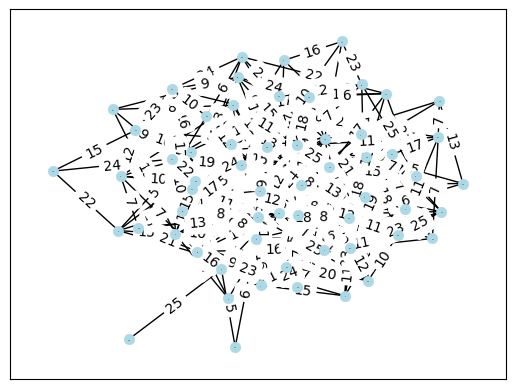

In [266]:
CityMap.visualize_city_map(r3_city_map, location_size=60, location_font_size=1, road_widths=1)

# R4

In [267]:
r4_benefit_matrix = TrafficAnalyzer.get_road_recommendations(r4_city_map, r3_r4_trips, shrinkage_factor=0.8)
r4_benefit_matrix

,source,destination,benefit
1318,12,23,1359.0
543,1,18,1115.2
135,1,14,1067.8
132,31,37,1053.0
728,49,56,1051.4
...,...,...,...
155,7,43,42.0
955,22,58,40.8
393,21,55,39.0
951,10,48,36.4


In [268]:
##### k = 1 # Recommended road to build first is the road segment
r4_max_benefit_matrix = TrafficAnalyzer.get_max_road_benefit(r4_benefit_matrix)
r4_max_benefit_matrix

,source,destination,benefit
1318,12,23,1359.0


In [269]:
source, destination = get_max_benefit_road_segment(r4_max_benefit_matrix)
print(f"({source}, {destination})")

(12, 23)


In [270]:
CityMap.add_road_segment(r4_city_map, source, destination)

{(0, 20): 15, (0, 3): 15, (0, 35): 22, (0, 59): 15, (0, 14): 8, (0, 27): 18, (0, 47): 7, (0, 32): 15, (0, 5): 17, (1, 12): 7, (1, 52): 18, (1, 50): 14, (1, 58): 5, (1, 39): 13, (1, 15): 10, (1, 13): 25, (1, 8): 6, (1, 22): 7, (2, 11): 15, (2, 3): 9, (2, 54): 11, (2, 8): 20, (2, 48): 23, (2, 20): 7, (3, 10): 12, (3, 38): 22, (3, 13): 5, (3, 31): 5, (4, 22): 5, (4, 14): 23, (4, 55): 11, (4, 6): 21, (4, 44): 8, (4, 5): 16, (4, 45): 18, (4, 15): 15, (5, 18): 5, (5, 31): 15, (5, 54): 24, (6, 25): 12, (6, 45): 6, (6, 31): 11, (6, 12): 10, (6, 46): 5, (6, 27): 7, (6, 21): 16, (6, 36): 25, (7, 12): 5, (7, 18): 17, (7, 22): 21, (7, 25): 5, (7, 45): 14, (8, 14): 22, (8, 23): 21, (8, 40): 18, (8, 35): 23, (8, 52): 20, (8, 51): 14, (8, 15): 10, (8, 34): 16, (8, 42): 6, (9, 31): 9, (9, 28): 10, (9, 56): 19, (9, 49): 16, (9, 48): 22, (9, 55): 16, (9, 46): 6, (9, 11): 16, (9, 47): 19, (9, 45): 17, (9, 58): 13, (10, 29): 5, (10, 16): 5, (10, 45): 24, (10, 54): 12, (10, 50): 10, (10, 30): 19, (10, 42):

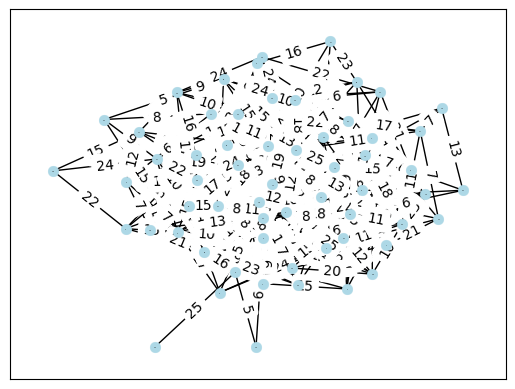

In [271]:
CityMap.visualize_city_map(r4_city_map, location_size=60, location_font_size=1, road_widths=1)

In [272]:
r4_benefit_matrix = TrafficAnalyzer.get_road_recommendations(r4_city_map, r3_r4_trips, shrinkage_factor=0.8)
r4_benefit_matrix

,source,destination,benefit
543,1,18,1115.2
135,1,14,1067.8
132,31,37,1053.0
728,49,56,1051.4
298,42,59,1044.0
...,...,...,...
155,7,43,42.0
955,22,58,40.8
393,21,55,39.0
951,10,48,36.4


In [273]:
##### k = 2 # Recommended road to build first is the road segment
r4_max_benefit_matrix = TrafficAnalyzer.get_max_road_benefit(r4_benefit_matrix)
r4_max_benefit_matrix

,source,destination,benefit
543,1,18,1115.2


In [274]:
source, destination = get_max_benefit_road_segment(r4_max_benefit_matrix)
print(f"({source}, {destination})")

(1, 18)


In [275]:
CityMap.add_road_segment(r4_city_map, source, destination)

{(0, 20): 15, (0, 3): 15, (0, 35): 22, (0, 59): 15, (0, 14): 8, (0, 27): 18, (0, 47): 7, (0, 32): 15, (0, 5): 17, (1, 12): 7, (1, 52): 18, (1, 50): 14, (1, 58): 5, (1, 39): 13, (1, 15): 10, (1, 13): 25, (1, 8): 6, (1, 22): 7, (1, 18): 10.2, (2, 11): 15, (2, 3): 9, (2, 54): 11, (2, 8): 20, (2, 48): 23, (2, 20): 7, (3, 10): 12, (3, 38): 22, (3, 13): 5, (3, 31): 5, (4, 22): 5, (4, 14): 23, (4, 55): 11, (4, 6): 21, (4, 44): 8, (4, 5): 16, (4, 45): 18, (4, 15): 15, (5, 18): 5, (5, 31): 15, (5, 54): 24, (6, 25): 12, (6, 45): 6, (6, 31): 11, (6, 12): 10, (6, 46): 5, (6, 27): 7, (6, 21): 16, (6, 36): 25, (7, 12): 5, (7, 18): 17, (7, 22): 21, (7, 25): 5, (7, 45): 14, (8, 14): 22, (8, 23): 21, (8, 40): 18, (8, 35): 23, (8, 52): 20, (8, 51): 14, (8, 15): 10, (8, 34): 16, (8, 42): 6, (9, 31): 9, (9, 28): 10, (9, 56): 19, (9, 49): 16, (9, 48): 22, (9, 55): 16, (9, 46): 6, (9, 11): 16, (9, 47): 19, (9, 45): 17, (9, 58): 13, (10, 29): 5, (10, 16): 5, (10, 45): 24, (10, 54): 12, (10, 50): 10, (10, 30)

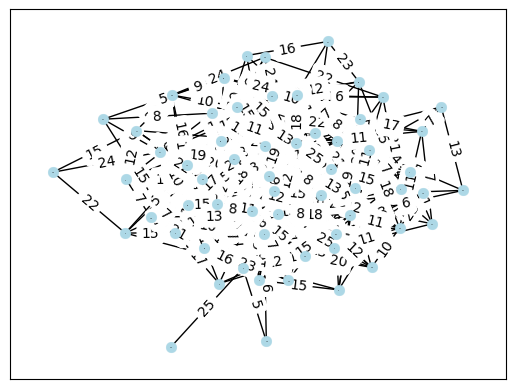

In [276]:
CityMap.visualize_city_map(r4_city_map, location_size=60, location_font_size=1, road_widths=1)

In [277]:
r4_benefit_matrix = TrafficAnalyzer.get_road_recommendations(r4_city_map, r3_r4_trips, shrinkage_factor=0.8)
r4_benefit_matrix

,source,destination,benefit
135,1,14,1067.8
132,31,37,1053.0
727,49,56,1051.4
298,42,59,1044.0
1531,14,47,1026.0
...,...,...,...
155,7,43,42.0
954,22,58,40.8
393,21,55,39.0
950,10,48,36.4


In [278]:
##### k = 3 # Recommended road to build last is the road segment
r4_max_benefit_matrix = TrafficAnalyzer.get_max_road_benefit(r4_benefit_matrix)
r4_max_benefit_matrix

,source,destination,benefit
135,1,14,1067.8


In [279]:
source, destination = get_max_benefit_road_segment(r4_max_benefit_matrix)
print(f"({source}, {destination})")

(1, 14)


In [280]:
CityMap.add_road_segment(r4_city_map, source, destination)

{(0, 20): 15, (0, 3): 15, (0, 35): 22, (0, 59): 15, (0, 14): 8, (0, 27): 18, (0, 47): 7, (0, 32): 15, (0, 5): 17, (1, 12): 7, (1, 52): 18, (1, 50): 14, (1, 58): 5, (1, 39): 13, (1, 15): 10, (1, 13): 25, (1, 8): 6, (1, 22): 7, (1, 18): 10.2, (1, 14): 11.4, (2, 11): 15, (2, 3): 9, (2, 54): 11, (2, 8): 20, (2, 48): 23, (2, 20): 7, (3, 10): 12, (3, 38): 22, (3, 13): 5, (3, 31): 5, (4, 22): 5, (4, 14): 23, (4, 55): 11, (4, 6): 21, (4, 44): 8, (4, 5): 16, (4, 45): 18, (4, 15): 15, (5, 18): 5, (5, 31): 15, (5, 54): 24, (6, 25): 12, (6, 45): 6, (6, 31): 11, (6, 12): 10, (6, 46): 5, (6, 27): 7, (6, 21): 16, (6, 36): 25, (7, 12): 5, (7, 18): 17, (7, 22): 21, (7, 25): 5, (7, 45): 14, (8, 14): 22, (8, 23): 21, (8, 40): 18, (8, 35): 23, (8, 52): 20, (8, 51): 14, (8, 15): 10, (8, 34): 16, (8, 42): 6, (9, 31): 9, (9, 28): 10, (9, 56): 19, (9, 49): 16, (9, 48): 22, (9, 55): 16, (9, 46): 6, (9, 11): 16, (9, 47): 19, (9, 45): 17, (9, 58): 13, (10, 29): 5, (10, 16): 5, (10, 45): 24, (10, 54): 12, (10, 50

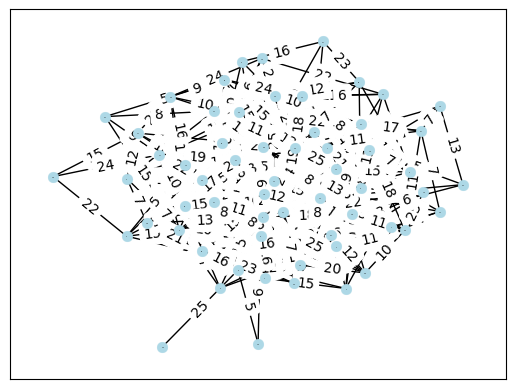

In [281]:
CityMap.visualize_city_map(r4_city_map, location_size=60, location_font_size=1, road_widths=1)

# R5

In [282]:
r5_city_map = Simulator.generate_map(connectedness=0.10)
r5_city_map

In [283]:
CityMap.get_city_map_statistics(r5_city_map)

node degree and node clustering
0 9 0.08333333333333333
1 9 0.1111111111111111
2 6 0.06666666666666667
3 6 0
4 8 0.14285714285714285
5 5 0
6 9 0.1388888888888889
7 5 0.1
8 11 0.16363636363636364
9 11 0.16363636363636364
10 8 0.03571428571428571
11 6 0.26666666666666666
12 12 0.13636363636363635
13 10 0.08888888888888889
14 16 0.11666666666666667
15 7 0.2857142857142857
16 9 0.05555555555555555
17 6 0.06666666666666667
18 11 0.07272727272727272
19 4 0.3333333333333333
20 6 0.06666666666666667
21 9 0.19444444444444445
22 5 0.1
23 8 0.21428571428571427
24 6 0.2
25 7 0.09523809523809523
26 6 0.2
27 9 0.2222222222222222
28 6 0.13333333333333333
29 11 0.16363636363636364
30 7 0.14285714285714285
31 13 0.16666666666666666
32 4 0.16666666666666666
33 7 0.047619047619047616
34 10 0.08888888888888889
35 5 0.1
36 1 0
37 4 0
38 3 0
39 7 0.14285714285714285
40 11 0.16363636363636364
41 7 0.09523809523809523
42 10 0.13333333333333333
43 8 0.03571428571428571
44 8 0.14285714285714285
45 16 0.09166666

{(0, 20): 12, (0, 3): 24, (0, 35): 20, (0, 59): 9, (0, 14): 19, (0, 27): 20, (0, 47): 5, (0, 32): 5, (0, 5): 11, (1, 12): 7, (1, 52): 9, (1, 50): 12, (1, 58): 21, (1, 39): 25, (1, 15): 24, (1, 13): 17, (1, 8): 12, (1, 22): 13, (2, 11): 19, (2, 3): 10, (2, 54): 22, (2, 8): 16, (2, 48): 13, (2, 20): 25, (3, 10): 14, (3, 38): 24, (3, 13): 19, (3, 31): 14, (4, 22): 14, (4, 14): 13, (4, 55): 23, (4, 6): 6, (4, 44): 12, (4, 5): 17, (4, 45): 8, (4, 15): 10, (5, 18): 9, (5, 31): 5, (5, 54): 22, (6, 25): 14, (6, 45): 17, (6, 31): 22, (6, 12): 14, (6, 46): 14, (6, 27): 8, (6, 21): 22, (6, 36): 20, (7, 12): 11, (7, 18): 6, (7, 22): 23, (7, 25): 11, (7, 45): 25, (8, 14): 22, (8, 23): 19, (8, 40): 22, (8, 35): 22, (8, 52): 14, (8, 51): 25, (8, 15): 8, (8, 34): 25, (8, 42): 9, (9, 31): 21, (9, 28): 18, (9, 56): 13, (9, 49): 17, (9, 48): 23, (9, 55): 20, (9, 46): 9, (9, 11): 19, (9, 47): 9, (9, 45): 6, (9, 58): 14, (10, 29): 15, (10, 16): 15, (10, 45): 17, (10, 54): 6, (10, 50): 7, (10, 30): 14, (10,

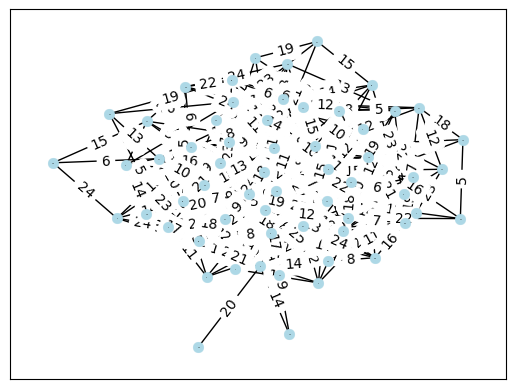

In [284]:
CityMap.visualize_city_map(r5_city_map, location_size=60, location_font_size=1, road_widths=1)

In [285]:
r5_trips = Simulator.generate_trips(city_map,
                                 traffic_start_datetime,
                                 traffic_end_datetime,
                                 TimeDeltaDiff.SECONDS)
r5_number_of_trips = 0

for trip in r5_trips:
    r5_number_of_trips += trip.numer_of_trips

r5_number_of_trips

36000

In [286]:
r5_trips

{Trip(source=32, destination=43, numer_of_trips=9): Trip(source=32, destination=43, numer_of_trips=9),
 Trip(source=41, destination=8, numer_of_trips=14): Trip(source=41, destination=8, numer_of_trips=14),
 Trip(source=59, destination=58, numer_of_trips=8): Trip(source=59, destination=58, numer_of_trips=8),
 Trip(source=41, destination=52, numer_of_trips=9): Trip(source=41, destination=52, numer_of_trips=9),
 Trip(source=2, destination=14, numer_of_trips=10): Trip(source=2, destination=14, numer_of_trips=10),
 Trip(source=44, destination=8, numer_of_trips=13): Trip(source=44, destination=8, numer_of_trips=13),
 Trip(source=59, destination=32, numer_of_trips=11): Trip(source=59, destination=32, numer_of_trips=11),
 Trip(source=10, destination=21, numer_of_trips=7): Trip(source=10, destination=21, numer_of_trips=7),
 Trip(source=48, destination=2, numer_of_trips=8): Trip(source=48, destination=2, numer_of_trips=8),
 Trip(source=24, destination=52, numer_of_trips=15): Trip(source=24, dest

In [287]:
r5_benefit_matrix = TrafficAnalyzer.get_road_recommendations(r5_city_map, r5_trips)
r5_benefit_matrix

,source,destination,benefit
112,12,47,4659.2
17,18,30,2812.0
132,31,37,2684.4
366,12,16,2653.2
500,23,47,2572.6
...,...,...,...
1480,27,42,98.8
535,11,27,96.0
39,6,15,89.6
1391,43,52,81.6


In [288]:
##### k = 1 # Recommended road to build first is the road segment
r5_max_benefit_matrix = TrafficAnalyzer.get_max_road_benefit(r5_benefit_matrix)
r5_max_benefit_matrix

,source,destination,benefit
112,12,47,4659.2


In [289]:
source, destination = get_max_benefit_road_segment(r5_max_benefit_matrix)
print(f"({source}, {destination})")

(12, 47)


In [290]:
CityMap.add_road_segment(r5_city_map, source, destination)

{(0, 20): 12, (0, 3): 24, (0, 35): 20, (0, 59): 9, (0, 14): 19, (0, 27): 20, (0, 47): 5, (0, 32): 5, (0, 5): 11, (1, 12): 7, (1, 52): 9, (1, 50): 12, (1, 58): 21, (1, 39): 25, (1, 15): 24, (1, 13): 17, (1, 8): 12, (1, 22): 13, (2, 11): 19, (2, 3): 10, (2, 54): 22, (2, 8): 16, (2, 48): 13, (2, 20): 25, (3, 10): 14, (3, 38): 24, (3, 13): 19, (3, 31): 14, (4, 22): 14, (4, 14): 13, (4, 55): 23, (4, 6): 6, (4, 44): 12, (4, 5): 17, (4, 45): 8, (4, 15): 10, (5, 18): 9, (5, 31): 5, (5, 54): 22, (6, 25): 14, (6, 45): 17, (6, 31): 22, (6, 12): 14, (6, 46): 14, (6, 27): 8, (6, 21): 22, (6, 36): 20, (7, 12): 11, (7, 18): 6, (7, 22): 23, (7, 25): 11, (7, 45): 25, (8, 14): 22, (8, 23): 19, (8, 40): 22, (8, 35): 22, (8, 52): 14, (8, 51): 25, (8, 15): 8, (8, 34): 25, (8, 42): 9, (9, 31): 21, (9, 28): 18, (9, 56): 13, (9, 49): 17, (9, 48): 23, (9, 55): 20, (9, 46): 9, (9, 11): 19, (9, 47): 9, (9, 45): 6, (9, 58): 14, (10, 29): 15, (10, 16): 15, (10, 45): 17, (10, 54): 6, (10, 50): 7, (10, 30): 14, (10,

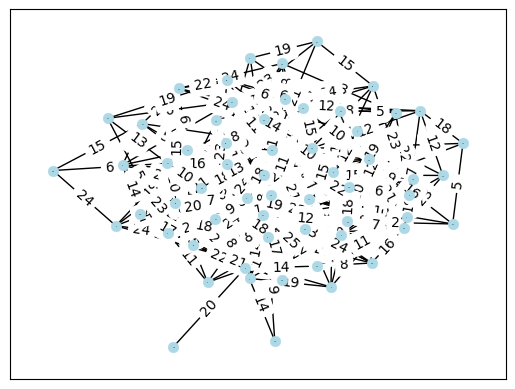

In [291]:
CityMap.visualize_city_map(r5_city_map, location_size=60, location_font_size=1, road_widths=1)

In [292]:
r5_benefit_matrix = TrafficAnalyzer.get_road_recommendations(r5_city_map, r5_trips)
r5_benefit_matrix

,source,destination,benefit
131,31,37,2828.8
17,18,30,2812.0
1403,31,55,2533.6
365,12,16,2485.2
30,10,44,2410.2
...,...,...,...
1479,27,42,98.8
534,11,27,96.0
39,6,15,89.6
1390,43,52,81.6


In [293]:
##### k = 2 # Recommended road to build first is the road segment
r5_max_benefit_matrix = TrafficAnalyzer.get_max_road_benefit(r5_benefit_matrix)
r5_max_benefit_matrix

,source,destination,benefit
131,31,37,2828.8


In [294]:
source, destination = get_max_benefit_road_segment(r5_max_benefit_matrix)
print(f"({source}, {destination})")

(31, 37)


In [295]:
CityMap.add_road_segment(r5_city_map, source, destination)

{(0, 20): 12, (0, 3): 24, (0, 35): 20, (0, 59): 9, (0, 14): 19, (0, 27): 20, (0, 47): 5, (0, 32): 5, (0, 5): 11, (1, 12): 7, (1, 52): 9, (1, 50): 12, (1, 58): 21, (1, 39): 25, (1, 15): 24, (1, 13): 17, (1, 8): 12, (1, 22): 13, (2, 11): 19, (2, 3): 10, (2, 54): 22, (2, 8): 16, (2, 48): 13, (2, 20): 25, (3, 10): 14, (3, 38): 24, (3, 13): 19, (3, 31): 14, (4, 22): 14, (4, 14): 13, (4, 55): 23, (4, 6): 6, (4, 44): 12, (4, 5): 17, (4, 45): 8, (4, 15): 10, (5, 18): 9, (5, 31): 5, (5, 54): 22, (6, 25): 14, (6, 45): 17, (6, 31): 22, (6, 12): 14, (6, 46): 14, (6, 27): 8, (6, 21): 22, (6, 36): 20, (7, 12): 11, (7, 18): 6, (7, 22): 23, (7, 25): 11, (7, 45): 25, (8, 14): 22, (8, 23): 19, (8, 40): 22, (8, 35): 22, (8, 52): 14, (8, 51): 25, (8, 15): 8, (8, 34): 25, (8, 42): 9, (9, 31): 21, (9, 28): 18, (9, 56): 13, (9, 49): 17, (9, 48): 23, (9, 55): 20, (9, 46): 9, (9, 11): 19, (9, 47): 9, (9, 45): 6, (9, 58): 14, (10, 29): 15, (10, 16): 15, (10, 45): 17, (10, 54): 6, (10, 50): 7, (10, 30): 14, (10,

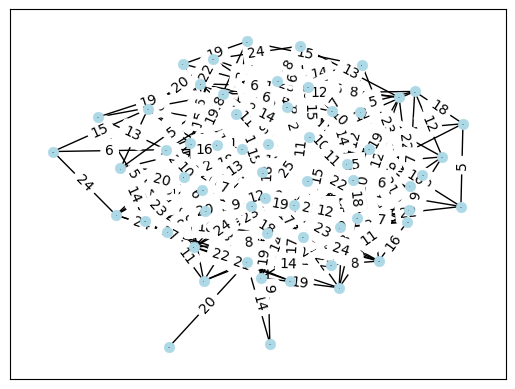

In [296]:
CityMap.visualize_city_map(r5_city_map, location_size=60, location_font_size=1, road_widths=1)

In [297]:
r5_benefit_matrix = TrafficAnalyzer.get_road_recommendations(r5_city_map, r5_trips)
r5_benefit_matrix

,source,destination,benefit
25,14,37,3399.48
17,18,30,2812.00
1402,31,55,2746.40
364,12,16,2485.20
549,0,31,2443.60
...,...,...,...
1478,27,42,98.80
533,11,27,96.00
39,6,15,89.60
1389,43,52,81.60


In [298]:
##### k = 3 # Recommended road to build last is the road segment
r5_max_benefit_matrix = TrafficAnalyzer.get_max_road_benefit(r5_benefit_matrix)
r5_max_benefit_matrix

,source,destination,benefit
25,14,37,3399.48


In [299]:
source, destination = get_max_benefit_road_segment(r5_max_benefit_matrix)
print(f"({source}, {destination})")

(14, 37)


In [300]:
CityMap.add_road_segment(r5_city_map, source, destination)

{(0, 20): 12, (0, 3): 24, (0, 35): 20, (0, 59): 9, (0, 14): 19, (0, 27): 20, (0, 47): 5, (0, 32): 5, (0, 5): 11, (1, 12): 7, (1, 52): 9, (1, 50): 12, (1, 58): 21, (1, 39): 25, (1, 15): 24, (1, 13): 17, (1, 8): 12, (1, 22): 13, (2, 11): 19, (2, 3): 10, (2, 54): 22, (2, 8): 16, (2, 48): 13, (2, 20): 25, (3, 10): 14, (3, 38): 24, (3, 13): 19, (3, 31): 14, (4, 22): 14, (4, 14): 13, (4, 55): 23, (4, 6): 6, (4, 44): 12, (4, 5): 17, (4, 45): 8, (4, 15): 10, (5, 18): 9, (5, 31): 5, (5, 54): 22, (6, 25): 14, (6, 45): 17, (6, 31): 22, (6, 12): 14, (6, 46): 14, (6, 27): 8, (6, 21): 22, (6, 36): 20, (7, 12): 11, (7, 18): 6, (7, 22): 23, (7, 25): 11, (7, 45): 25, (8, 14): 22, (8, 23): 19, (8, 40): 22, (8, 35): 22, (8, 52): 14, (8, 51): 25, (8, 15): 8, (8, 34): 25, (8, 42): 9, (9, 31): 21, (9, 28): 18, (9, 56): 13, (9, 49): 17, (9, 48): 23, (9, 55): 20, (9, 46): 9, (9, 11): 19, (9, 47): 9, (9, 45): 6, (9, 58): 14, (10, 29): 15, (10, 16): 15, (10, 45): 17, (10, 54): 6, (10, 50): 7, (10, 30): 14, (10,

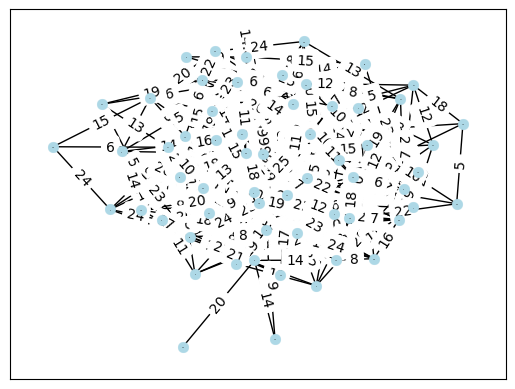

In [301]:
CityMap.visualize_city_map(r5_city_map, location_size=60, location_font_size=1, road_widths=1)